# Đồ án cuối kỳ - Môn Lập trình khoa học dữ liệu
# Giáo viên giảng dạy: Thầy Trần Trung Kiên
## Sinh viên thực hiện:

                        Tạ Võ Anh Khuê - 19120551

                        Nguyễn Minh Long - 19120568

---

## Import thư viện

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 

## Thùng chứa github của nhóm em [ở đây](https://github.com/RaitoRyuWorker/Programing-for-Data-Science-Final-Project) ạ.

---

## Thu thập dữ liệu

Dữ liệu được sử dụng trong bài tập này là dữ liệu về các phàn nàn, khiếu nại của người dùng được gửi tới CFBP(Consumer Financial Protection Bureau) - tạm gọi là Cục Bảo Vệ Tài Chính Cho Người Tiêu Dùng. Dữ liệu được lấy [ở đây](https://www.kaggle.com/meetnagadia/consumer-complaint-finance). 

Cục Bảo Vệ Tài Chính Cho Người Tiêu Dùng (CFPB) là một cơ quan của chính phủ liên bang Mỹ được thành lập để bảo đảm sự hiệu quả của những sản phẩm và dịch vụ tài chính cho mọi người như mua nhà, chọn lựa một thẻ tín dụng, gửi tiền cho người thân ở nước ngoài, hoặc khi sử dụng bất cứ loại sản phẩm tài chánh khác ở Mỹ.
Cục có chức năng giám sát hoạt động của các ngân hàng, liên hiệp tín dụng (credit union), những công ty tài chính khác và thi hành những quy luật tài chính để bảo vệ người dùng tránh khỏi các hành vi bất công, dối trá và lạm dụng.

Đôi nét về dữ liệu này: Dữ liệu thể hiện các complaint(khiếu nại, phàn nàn) của người dùng về các vấn đề tài chính mà họ gặp phải. Người dùng trình báo lên Cục Bảo Vệ(CFBP) và cục có trách nhiệm liên lạc và trao đổi, chuyển tiếp thông tin giúp người dùng tới các công ty liên quan. Dữ liệu được công khai ghi nhận(published) bởi CFPB sau khi mà các công ty phản hồi, xác nhận có liên quan đến các vấn đề của người dùng hoặc sau 15 ngày, tùy điều kiện nào đến trước.

---

Do dữ liệu này trên kaggle em thấy đc update khá gần đây, có thể lúc thầy chấm thì dữ liệu được update thêm, nên để đảm bảo lúc thầy chấm thì dữ liệu vẫn giống lúc chúng em làm thì thầy có thể download dữ liệu ở [đường link này](https://drive.google.com/file/d/1hSwnXiOaIn9YelDYFqu-mAZk_PKgnBJT/view?usp=sharing) ạ.

## Khám phá dữ liệu

## Đọc dữ liệu từ file

Dữ liệu được đặt cùng cấp folder của file noteboook, đọc vào bằng hàm read_csv.

In [2]:
df = pd.read_csv('complaints.csv')
df.head()

D:\Miniconda\envs\min_ds-env\lib\site-packages\IPython\core\interactiveshell.py:3172: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-06-13,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,PA,18640.0,NaN,Consent not provided,Web,2019-06-13,Closed with explanation,Yes,NaN,3274605
1,2019-11-01,Vehicle loan or lease,Loan,Struggling to pay your loan,Denied request to lower payments,I contacted Ally on Friday XX/XX/XXXX after fa...,Company has responded to the consumer and the ...,ALLY FINANCIAL INC.,NJ,8854.0,NaN,Consent provided,Web,2019-11-01,Closed with explanation,Yes,NaN,3425257
2,2019-04-01,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,19067.0,NaN,Consent not provided,Web,2019-04-01,Closed with explanation,Yes,NaN,3198225
3,2019-04-10,Credit card or prepaid card,Store credit card,Closing your account,Can't close your account,NaN,Company believes it acted appropriately as aut...,Atlanticus Services Corporation,WI,54409.0,Older American,NaN,Referral,2019-04-16,Closed with explanation,No,NaN,3207424
4,2020-04-21,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Capital One Auto Finance incorrectly and witho...,NaN,CAPITAL ONE FINANCIAL CORPORATION,GA,30024.0,NaN,Consent provided,Web,2020-04-21,Closed with explanation,Yes,NaN,3616748


Xử lý cột dữ liệu Tags, theo mô tả dữ liệu trên kaggle thì giá trị cột Tags bị thiếu quá nhiều, gần 90% giá trị bị thiếu ở cột này => Ta có thể bỏ cột này đi vì gần như nó không đóng góp gì cho việc phân tích dữ liệu sau này.

In [3]:
df = df.drop('Tags',axis=1)

### Mỗi cột dữ liệu có ý nghĩa là gì?

Data có tổng cộng 17 cột, với các ý nghĩa cơ bản của từng cột như sau:
* Date received: Ngày nhận được khiếu nại.
* Product: Loại sản phẩm, dịch vụ khiếu nại,....
* Sub product: Thêm thông tin, làm rõ hơn về sản phẩm, dịch vụ,... trong product.
* Issue: Vấn đề người dùng gặp phải.
* Sub-issue: Thông tin thêm, làm rõ về vấn đề gặp phải trong issue.
* Consumer complaint narrative: Miêu tả, phàn nàn, khiếu nại của người dùng đối với vấn đề họ gặp phải.
* Company public response: Phản hồi chính thức, công khai của phía công ty.
* Company: Tên công ty.
* State: Tên bang, thuộc địa của Mỹ nơi người gửi.
* ZIP code : Mã zip ( giống mã bưu điện ) người gửi.
* Consumer consent provided: Người dùng có publish cái complaint narrative cho mọi người khác biết hay không?
* Submitted via: Khiếu nại được gửi thông qua dạng nào(web,fax,email,...).
* Date sent to company: Ngày khiếu nại được gửi đến công ty.
* Company response to consumer: Tình trạng phản hồi, giải quyết của công ty đối với người khiếu nại.
* Timely response: Công ty có trả lời đúng thời hạn hay không?
* Consumer disputed?: Người dùng có muốn mở cuộc tranh chấp, cần bồi thường hay không?
* Complaint ID: ID của đơn khiếu nại.

### Dữ liệu có bao nhiêu dòng và bao nhiêu cột

In [4]:
size = df.shape
size

(2396033, 17)

### Tìm các dòng bị lặp thông qua giá trị của cột 'Complaint ID'

In [5]:
num_duplicated_rows = df.duplicated(subset=['Complaint ID']).sum()
num_duplicated_rows

0

#### Kiểm tra giá trị ở cột Consumer disputed? 

In [6]:
df['Consumer disputed?'].unique()

array([nan, 'No', 'Yes'], dtype=object)

Trong trường hợp này ta có thể hiểu được rằng NaN sẽ có ý nghĩa tương đương với No, vì người dùng khi họ điền thông tin khiếu nại vấn đề thì có các vấn đề thì có thể phần này là phần optional, cho người dùng điền vào là có cần yêu cầu công ty bồi thường thiệt hại, tranh chấp tài sản gì không thì có người họ ghi rõ ràng là Yes, No nhưng có người họ thấy không có nhu cầu đó, nên tâm lý chung họ không cần nhu cầu đền bù thì họ không điền luôn, dẫn đến bị trống thông tin.

In [7]:
df['Consumer disputed?'] = df['Consumer disputed?'].fillna('No')
df['Consumer disputed?'].unique()

array(['No', 'Yes'], dtype=object)

### Mỗi cột có kiểu dữ liệu gì?

In [8]:
df.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

Xem kiểu dữ liệu thật sự bên trong mỗi cột.

In [9]:
def open_object_dtype(s):
    dtypes = set()
    a = s.apply(lambda x: type(x))
    dtypes = set((a.unique()))
    return dtypes   
col = df.columns
for i in range(len(col)):
    temp = open_object_dtype(df[col[i]])
    print(str(col[i])+' ' +str(temp))

Date received {<class 'str'>}
Product {<class 'str'>}
Sub-product {<class 'str'>, <class 'float'>}
Issue {<class 'str'>}
Sub-issue {<class 'str'>, <class 'float'>}
Consumer complaint narrative {<class 'str'>, <class 'float'>}
Company public response {<class 'str'>, <class 'float'>}
Company {<class 'str'>}
State {<class 'str'>, <class 'float'>}
ZIP code {<class 'str'>, <class 'float'>}
Consumer consent provided? {<class 'str'>, <class 'float'>}
Submitted via {<class 'str'>}
Date sent to company {<class 'str'>}
Company response to consumer {<class 'str'>, <class 'float'>}
Timely response? {<class 'str'>}
Consumer disputed? {<class 'str'>}
Complaint ID {<class 'int'>}


### Chuyển 2 cột 'Date received' và 'Date sent to company' sang dạng Datetime

In [10]:
df['Date received'] = pd.to_datetime(df['Date received'],format='%Y-%m-%d')
df['Date sent to company'] = pd.to_datetime(df['Date sent to company'],format='%Y-%m-%d')

In [11]:
df.dtypes

Date received                   datetime64[ns]
Product                                 object
Sub-product                             object
Issue                                   object
Sub-issue                               object
Consumer complaint narrative            object
Company public response                 object
Company                                 object
State                                   object
ZIP code                                object
Consumer consent provided?              object
Submitted via                           object
Date sent to company            datetime64[ns]
Company response to consumer            object
Timely response?                        object
Consumer disputed?                      object
Complaint ID                             int64
dtype: object

#### Xét giá trị trong cột 'Date received' có lớn hơn giá trị trong cột 'Date sent to company'. Bởi vì nếu ngày received mà xảy ra sau ngày sent to company là vô lý. Ta sẽ không lấy các dòng vô lý đó.

In [12]:
df = df.loc[df['Date received'] <= df['Date sent to company']]
df.shape

(2388981, 17)

---

## Đặt câu hỏi 

Khi tìm hiều về dữ liệu và xem xét, thì chúng em đưa ra 2 vấn đề như sau:
1. Theo từng giai đoạn, tỉ lệ phần trăn của từng loại vấn đề trong mỗi giai đoạn là như thế nào? Câu hỏi này sẽ cho ta biết được trong các giai đoạn khác nhau thì các vấn đề liên quan đến tài chính của người dân Mỹ tồn đọng nhiều nhất là gì, và có lý do nào đứng sau các vấn đề đó hay không. Và có thể trả lời được câu hỏi này ta cũng có thể khái quát phần nào các vấn đề của cả nước Mỹ đang gặp phải trong phát triển kinh tế(tất nhiên là có thể phần nào thôi, không thể nào trả lời được toàn bộ 100%, do để làm được điều đó thì cần rất nhiều yếu tố khác nữa, chính trị chẳng hạn chứ không chỉ riêng các vấn đề liên quan đến nền kinh tế đơn lẻ).


2. Những công ty nào có khả năng xử lý, giải quyết các vấn đề của người dùng một cách thỏa đáng nhất? Việc đánh giá chất lượng công ty không chỉ đơn thuần qua những sản phẩm, dịch vụ họ cung cấp mà khả năng giải quyết vấn đề, khả năng chăm sóc người dùng với các vấn đề mà họ gặp phải nữa. Trả lời được câu hỏi này thì ta sẽ biết được các công ty nào chúng ta nên tin tưởng, đặc biệt là lĩnh vực tài chính như thế này thì việc chọn các công ty uy tín càng nên được chú trọng hơn.

## Xử lý, phân tích dữ liệu trả lời cho câu hỏi 1

Các bước xử lí câu 1:
- Có những giá trị nào xuất hiện trong cột Product.
- Có bao nhiêu năm để ta chia các năm theo từng giai đoạn.
- Tính % mỗi product theo từng giai đoạn.
- Vẽ biểu đồ cột để thể hiện.

Các loại vấn đề xuất hiện trong dữ liệu:

In [13]:
df['Product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    905199
Debt collection                                                                 395997
Mortgage                                                                        341805
Credit reporting                                                                138699
Credit card or prepaid card                                                     129578
Checking or savings account                                                     107787
Credit card                                                                      88028
Bank account or service                                                          85806
Student loan                                                                     63976
Money transfer, virtual currency, or money service                               35448
Consumer Loan                                                                    31462
Vehicle loan or lease                      

Ta thấy sẽ có những giá trị của Sub-product xuất hiện trong cột Product. Có lẽ là do lỗi nhập liệu. Vậy nên ta sẽ đổi những giá trị sai này theo Product của nó dựa trên mô tả dữ liệu trên trang gốc.

In [14]:
df.Product = df['Product'].replace('Credit reporting','Credit reporting, credit repair services, or other personal consumer reports')
df.Product = df['Product'].replace('Credit card','Credit card or prepaid card')
df.Product = df['Product'].replace('Bank account or service','Checking or savings account')
df.Product = df['Product'].replace('Consumer Loan','Payday loan, title loan, or personal loan')
df.Product = df['Product'].replace('Payday loan','Payday loan, title loan, or personal loan')
df.Product = df['Product'].replace('Money transfers','Money transfer, virtual currency, or money service')
df.Product = df['Product'].replace('Prepaid card','Credit card or prepaid card')
df.Product = df['Product'].replace('Other financial service','Checking or savings account')
df.Product = df['Product'].replace('Virtual currency','Money transfer, virtual currency, or money service')
df['Product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    1043898
Debt collection                                                                  395997
Mortgage                                                                         341805
Credit card or prepaid card                                                      221425
Checking or savings account                                                      194651
Student loan                                                                      63976
Payday loan, title loan, or personal loan                                         56924
Money transfer, virtual currency, or money service                                40740
Vehicle loan or lease                                                             29565
Name: Product, dtype: int64

Ta thấy các dữ liệu sai đã được đổi thành dạng đúng.
Các năm trong dữ liệu:

In [15]:
df['Date received'].dt.year.value_counts(dropna=False)

2021    478008
2020    444357
2019    277342
2018    257281
2017    242948
2016    191461
2015    168468
2014    149136
2013    105290
2012     72170
2011      2520
Name: Date received, dtype: int64

In [16]:
#Chia các năm thành 3 giai đoạn với số năm gần như bằng nhau.
lap_1 = [2011,2012,2013,2014] # giai đọan 2011-2014
lap_2 = [2015,2016,2017,2018] # giai đoạn 2015-2018
lap_3 = [2019,2020,2021] # giai đoạn 2019-2021

df_lap_1 = df[df['Date received'].dt.year.isin(lap_1)]['Product'].value_counts(normalize=True,dropna=False) * 100
df_lap_2 = df[df['Date received'].dt.year.isin(lap_2)]['Product'].value_counts(normalize=True,dropna=False) * 100
df_lap_3 = df[df['Date received'].dt.year.isin(lap_3)]['Product'].value_counts(normalize=True,dropna=False) * 100

Trực quan hóa dữ liệu:

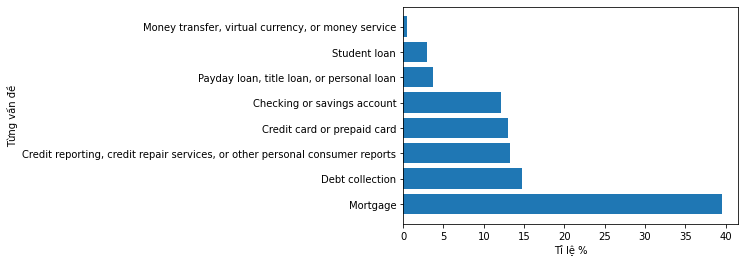

In [17]:
plt.barh(df_lap_1.index, df_lap_1.values)
plt.xlabel('Tỉ lệ %')
plt.ylabel('Từng vấn đề')
plt.show()

Với giai đoạn này thì ta có thể thấy vấn đề liên quan đến Mortage(nhu cầu vay mượn, thế chấp) cao hơn hẳn các vấn đề còn lại, hơn khoảng 2,5 lần so với vấn đề thứ 2 là debt collection( thu tiền nợ). Có thế thấy  giai đoạn này người dùng rất hay có nhu cầu này có thể để đầu tư kinh doanh, hoặc có thể cũng là do cần tiền để trả nợ(các vấn đề trong việc thu tiền nợ là đứng 2 như đã thấy). Xem lại thực tế một chút thì trước đó ở Mỹ có xảy ra cuộc khủng hoảng kinh tế lớn giai đoạn 2007-2009. Và có thể vào những năm trong giai đoạn 2011 này thì mọi người phải cố gắng khắc phục hậu quả do cuộc khủng hoảng gây ra(do việc kinh doanh không thuận lợi, thất nghiệp vân vân....) nên họ phải tính đến chuyện thế chấp, cầm cố tài sản để rồi từ đó phát sinh ra nhiều vấn đề xung quanh việc này, hay cũng có thể do chính phủ quản lý việc này chưa tốt do tàn dư của khủng hoảng trước đó nữa.

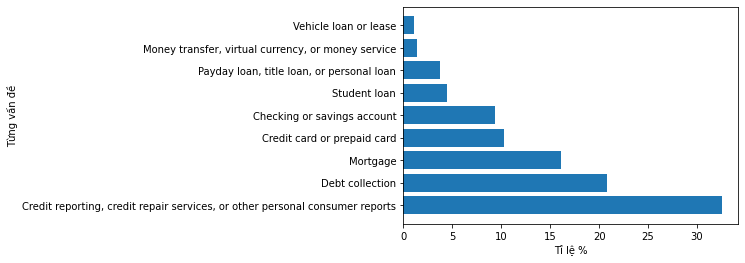

In [18]:
plt.barh(df_lap_2.index, df_lap_2.values)
plt.xlabel('Tỉ lệ %')
plt.ylabel('Từng vấn đề')
plt.show()

Sang đến giai đoạn này thì nhu cầu vay mượn, thế chấp không còn đứng đầu nữa mà thay vào đó các vấn liên quan đến thẻ tín dụng, các nhu cầu cá nhân tăng cao => Có vẻ như nền kinh tế lúc nãy đã ổn định trở lại, và nhịp sống của con người đã ổn định hơn, người ta bắt đầu sử dụng tiền bạc, tài sản thoải mái hơn 1 chút từ đó không còn quá nhiều vấn đề liên quan vay mượn nữa mà các vấn đề liên quan đến sử dụng tiền bạc phát sinh ra nhiều hơn giai đoạn trước. Các vấn đề liên quan đến tài khoản tiết kiệm, tài khoản thanh toán của người dùng không thay đổi nhiều so với giai đoạn trước.

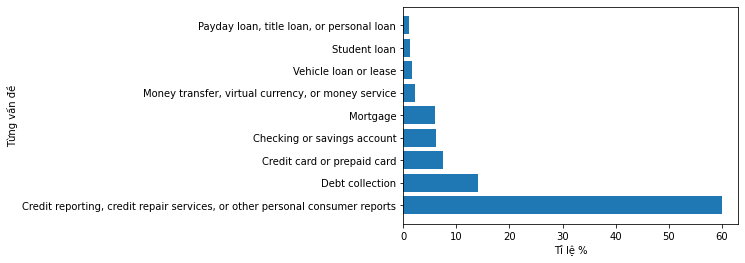

In [19]:
plt.barh(df_lap_3.index, df_lap_3.values)
plt.xlabel('Tỉ lệ %')
plt.ylabel('Từng vấn đề')
plt.show()

Sang đến giai đoạn gần đây nhất thì các vấn đề liên quan đến tài chính cá nhân, tiền bạc, lỗi thẻ ngân hàng, tín dụng,... vẫn chiếm số lượng nhiều nhất và chiếm tỉ lệ vượt trội so với các vấn đề khác(gần 60%), có thể thấy giai đoạn này kinh tế đã ổn định và phát triển trở lại, và có lẽ vậy nên người ta tập trung nhiều hẳn vào các vấn đề chi tiêu các nhân và gây ra khá nhiều vấn đề xung quanh việc này. Có lẻ một phần do các công ty tài chính chưa thực sự kiểm soát tốt các chất lượng trong dịch vụ của mình cung cấp, hay do số lượng nhu cầu quá nhiều dẫn đến sai sót trong cách quản lý đối với các vấn đề mắc phải.

## Xử lý, phân tích dữ liệu trả lời cho câu hỏi 2

Đầu tiên, chúng ta sẽ lọc ra những công ty xuất hiện trên 1000 lần trong dữ liệu này. Lý do là vì khi đánh giá một công ty thì chúng ta cần một tập số liệu đủ lớn, chứ không thể chỉ đánh giá một công ty mà chỉ có một hay vài trường hợp mà thôi. Có thể ta thấy hơi lấn cấn ở chỗ này một chút, nếu một công ty ít lời khiếu nại thì nó phải tốt hơn một công ty nhiều lời khiếu nại chứ nhỉ? Có thể lý giải cho vấn đề này như sau: 

- Thứ nhất là trong câu hỏi này ta đánh giá về một phương diện của công ty đó là khả năng xử lý, giải quyết cho người dùng khi họ gặp vấn đề, nói chung là vấn đề hậu mãi sau khi cung cấp dịch vụ, đó là mục tiêu chính của ta trong phần này. 

- Thứ hai, một công ty ít gặp vấn đề, khiếu nại,... thì có thể không hẳn là do công ty đó ít 'phốt', công ty đó tốt mà có thể do quá ít người dùng dịch vụ của công ty đó, quá ít người biết đến công ty, nên thành ra các trục trặc phát sinh đối với dịch vụ mà công ty cung cấp cũng ít theo. Và việc ta đánh giá một công ty nhỏ, có ít người dùng như vậy thì cũng một phần không được công bằng với các công ty lớn khác, vì khối lượng, áp lực xử lý công việc của các công ty nhỏ đó có thể nhỏ hơn rất nhiều so với áp lực mà công ty lớn hơn phải đối mặt.

Câu hỏi phần này chúng ta tập trung giải quyết xem liệu công ty nào sẽ đảm bảo được quyền lợi tốt nhất cho người dùng, ít nhất cũng là về mặt xử lý vấn đề phát sinh trong quá trình sử dụng của người sử dụng dịch vụ, còn tất nhiên để đánh giá một công ty là tốt hay xấu thì còn rất nhiều vấn đề liên quan chứ không chỉ riêng mỗi hạng mục này.

In [20]:
temp = df['Company'].value_counts()
temp = temp[temp > 1000]
df_Large_Comp = df[df['Company'].isin(temp.index)]

In [21]:
df_Large_Comp['Company response to consumer'].value_counts()

Closed with explanation            1727907
Closed with non-monetary relief     230369
Closed with monetary relief          99904
Closed without relief                17549
In progress                          15780
Closed                               10626
Closed with relief                    5189
Untimely response                      926
Name: Company response to consumer, dtype: int64

### Giải thích sơ bộ về ý nghĩa của các giá trị

Closed with explanation : Kết thúc với lời giải thích cho người dùng.

Closed with non-monetary relief: Kết thúc với việc công ty khắc phục tổn hại cho người dùng bằng các hình thức ngoài tiền bạc điển hình như việc chỉnh sửa điều khoản hợp đồng.

Closed with monetary relief: Kết thúc với việc công ty chi đền bù, khắc phục tổn hại cho người dùng bằng tiền bạc.

Closed without relief : Kết thúc mà không có khoản chi trả, khắc phục nào cho người dùng.

In progress : Vẫn đang trong quá trình giải quyết.

Closed : Kết thúc mà không có lời giải thích, giải quyết rõ ràng nào.

Closed with relief : Kết thúc và có sự đền bù, bồi thường ( bằng 1 hình thức nào đó ).

Untimely response : Phía công ty phản hồi không kịp thời, không giải quyết vấn đề người dùng trong thời gian quy định.

Từ các định nghĩa trên thì chúng em phân ra được các yếu tố thành 2 dạng sau: 

    Tích cực: Closed with explanation, Closed with non-monetary relief, Closed with monetary relief, Closed with relief

    Tiêu cực: Closed without relief, Closed, Untimely response, In progress                        

Bọn em quyết định đánh giá các công ty theo các tiêu chí chính như sau: 

1.  Tính tích cực trong phản hồi của công ty đối với khách hàng
2.  Mức độ phản hồi đúng thời hạn của công ty đối với khách hàng
3.  Khách hàng có muốn yêu cầu tranh chấp gì thêm sau khi nhận được phản hồi hay không?

In [22]:
optimis = ['Closed with explanation', 'Closed with non-monetary relief', 'Closed with monetary relief', 'Closed with relief']

optimis_res = df_Large_Comp[df_Large_Comp['Company response to consumer'].isin(optimis)]

optimis_time = df_Large_Comp[df_Large_Comp['Timely response?'] == 'Yes']

optimis_dispute = df_Large_Comp[df_Large_Comp['Consumer disputed?'] == 'No']


Ở đây ta sẽ thấy top 10 công ty có tổng số các giá trị tích cực tốt nhất theo các tiêu chí đã trình bày

In [23]:
optimis_res = optimis_res['Company'].value_counts().head(10)
optimis_res

EQUIFAX, INC.                             367914
TRANSUNION INTERMEDIATE HOLDINGS, INC.    265167
Experian Information Solutions Inc.       253351
BANK OF AMERICA, NATIONAL ASSOCIATION     100689
WELLS FARGO & COMPANY                      88194
JPMORGAN CHASE & CO.                       81796
CITIBANK, N.A.                             69439
CAPITAL ONE FINANCIAL CORPORATION          59888
Navient Solutions, LLC.                    35057
SYNCHRONY FINANCIAL                        34200
Name: Company, dtype: int64

In [24]:
optimis_time = optimis_time['Company'].value_counts().head(10)
optimis_time

EQUIFAX, INC.                             367100
TRANSUNION INTERMEDIATE HOLDINGS, INC.    273567
Experian Information Solutions Inc.       255334
BANK OF AMERICA, NATIONAL ASSOCIATION     105041
WELLS FARGO & COMPANY                      87701
JPMORGAN CHASE & CO.                       84517
CITIBANK, N.A.                             70673
CAPITAL ONE FINANCIAL CORPORATION          61280
Navient Solutions, LLC.                    35327
SYNCHRONY FINANCIAL                        34805
Name: Company, dtype: int64

In [25]:
optimis_dispute = optimis_dispute['Company'].value_counts().head(10)
optimis_dispute

EQUIFAX, INC.                             358934
TRANSUNION INTERMEDIATE HOLDINGS, INC.    268102
Experian Information Solutions Inc.       250116
BANK OF AMERICA, NATIONAL ASSOCIATION      93232
WELLS FARGO & COMPANY                      79867
JPMORGAN CHASE & CO.                       75172
CITIBANK, N.A.                             64417
CAPITAL ONE FINANCIAL CORPORATION          57748
SYNCHRONY FINANCIAL                        32882
Navient Solutions, LLC.                    32281
Name: Company, dtype: int64

Dựa vào các kết quả trên, ta có được danh sách top 10 công ty tốt nhất theo từng các tiêu chí đã nêu trên

In [26]:
Big_10 = ['EQUIFAX, INC.','TRANSUNION INTERMEDIATE HOLDINGS, INC.','Experian Information Solutions Inc.',
          'BANK OF AMERICA, NATIONAL ASSOCIATION','WELLS FARGO & COMPANY','JPMORGAN CHASE & CO.','CITIBANK, N.A.',
          'CAPITAL ONE FINANCIAL CORPORATION','SYNCHRONY FINANCIAL','Navient Solutions, LLC.']
df_Big_10 = df_Large_Comp[df_Large_Comp['Company'].isin(Big_10)]

Tiếp theo ta sẽ xếp hạng 10 công ty này, xem mức độ chăm sóc khách hàng của các công ty theo thứ tự.

Đầu tiên ta tính tỉ lệ các giá trị tích cực trên tổng số lần xuất hiện của công ty có trong dữ liệu theo 3 tiêu chí chính.

In [27]:
#Tiêu chí phản hồi:
Top_10_res = (optimis_res * 100 / df_Big_10['Company'].value_counts()).sort_values(ascending=False)
Top_10_res

EQUIFAX, INC.                             99.741100
Navient Solutions, LLC.                   99.227286
Experian Information Solutions Inc.       99.219873
SYNCHRONY FINANCIAL                       98.213773
CITIBANK, N.A.                            97.744964
CAPITAL ONE FINANCIAL CORPORATION         97.601043
TRANSUNION INTERMEDIATE HOLDINGS, INC.    96.895452
JPMORGAN CHASE & CO.                      96.670724
WELLS FARGO & COMPANY                     96.379512
BANK OF AMERICA, NATIONAL ASSOCIATION     93.657216
Name: Company, dtype: float64

In [28]:
#Tiêu chí thời gian:
Top_10_time = (optimis_time * 100 / df_Big_10['Company'].value_counts()).sort_values(ascending=False)
Top_10_time

Experian Information Solutions Inc.       99.996475
Navient Solutions, LLC.                   99.991509
TRANSUNION INTERMEDIATE HOLDINGS, INC.    99.964920
SYNCHRONY FINANCIAL                       99.951180
JPMORGAN CHASE & CO.                      99.886542
CAPITAL ONE FINANCIAL CORPORATION         99.869622
EQUIFAX, INC.                             99.520426
CITIBANK, N.A.                            99.481989
BANK OF AMERICA, NATIONAL ASSOCIATION     97.705287
WELLS FARGO & COMPANY                     95.840755
Name: Company, dtype: float64

In [29]:
#Tiêu chí tranh chấp:
Top_10_dispute = (optimis_dispute * 100 / df_Big_10['Company'].value_counts()).sort_values(ascending=False)
Top_10_dispute

TRANSUNION INTERMEDIATE HOLDINGS, INC.    97.967939
Experian Information Solutions Inc.       97.952950
EQUIFAX, INC.                             97.306632
SYNCHRONY FINANCIAL                       94.428809
CAPITAL ONE FINANCIAL CORPORATION         94.113429
Navient Solutions, LLC.                   91.369941
CITIBANK, N.A.                            90.675807
JPMORGAN CHASE & CO.                      88.842140
WELLS FARGO & COMPANY                     87.279662
BANK OF AMERICA, NATIONAL ASSOCIATION     86.720988
Name: Company, dtype: float64

Như vậy ta có thể thấy là với mỗi tiêu chí thì thứ tự các công ty khác nhau, cho thấy là mỗi công ty có điểm tốt riêng của mình. Có lẽ trong trường hợp này ta cần 1 thang điểm đánh giá chung cho các công ty, để cho ra một kết quả cuối cùng tốt nhất.

Bọn em sẽ đưa ra thang điểm để đánh giá theo mức độ quan trọng của các yếu tố như sau: 

- Consumer disputed = 45% 

- Company response to consumer = 35%

- Timely response = 20%

Thang điểm trên được dựa vào tiêu chí riêng của bọn em: 
- Disputed đứng cao nhất vì bọn em cho rằng dù câu trả lời của công ty là gì thì quan trọng nhất vẫn là khách hàng có cảm thấy hài lòng với cách giải quyết đó không, từ đó họ có chọn tiếp tục tranh chấp, đòi hỏi bồi thường thêm hay thôi không cần nữa, nên bọn em đánh giá yếu tố này cao hơn 1 chút so với yếu tố câu trả lời của công ty.
- Tiếp theo là response, sở dĩ bọn em cho respone cao hơn timely là vì bọn em cho rằng có thể có các trường hợp là công ty đã đưa ra 1 phương án giải quyết tối ưu, thỏa đáng nhất rồi, tuy nhiên có những người dùng họ đôi khi khá là vô lý, kiểu dạng đòi hỏi quá mức, đòi hỏi bồi thường thêm theo kiểu hơi tham, nên bọn em cho respone 35%, chỉ thấp hơn một chút so với Disputed.
- Cuối củng là đến timely - phản hồi, giải quyết đúng thời hạn. Thì bọn em đánh giá yếu tố này thấp nhất là vì tuy rằng việc phản hồi sớm, đúng thời hạn là quan trọng tuy nhiên đôi khi công ty cần nhiều thời gian hơn bình thường để tìm cách, giải quyết, đưa ra một phương án tối ưu nhất có thể nên nếu phản hồi chậm mà kết quả mang lại vẫn tốt thì có thể châm chước một xíu, nên bọn em cho yếu tố này là 20% trên thang chấm thôi.

In [30]:
Final_optimis_10 = ((Top_10_res * 0.35 + Top_10_time * 0.2 + Top_10_dispute * 0.45)).sort_values(ascending=False)
Final_optimis_10

Experian Information Solutions Inc.       98.805078
EQUIFAX, INC.                             98.601455
TRANSUNION INTERMEDIATE HOLDINGS, INC.    97.991965
SYNCHRONY FINANCIAL                       96.858021
CAPITAL ONE FINANCIAL CORPORATION         96.485332
Navient Solutions, LLC.                   95.844325
CITIBANK, N.A.                            94.911248
JPMORGAN CHASE & CO.                      93.791025
WELLS FARGO & COMPANY                     92.176828
BANK OF AMERICA, NATIONAL ASSOCIATION     91.345528
Name: Company, dtype: float64

Tuy nhiên, vì là thang điểm được dựa vào tiêu chí riêng của bọn em nên có thể đúng có thể sai nên bọn em sẽ tính thử thêm với tỷ lệ phần trăm  được chia đều cho 3 tiêu chí, thử xem với một cách đánh giá khác đi thì kết quả sẽ như thế nào.

In [31]:
Optimis_10_without_rate = Final_optimis_10 = ((Top_10_res  + Top_10_time  + Top_10_dispute) / 3).sort_values(ascending=False)
Optimis_10_without_rate

Experian Information Solutions Inc.       99.056433
EQUIFAX, INC.                             98.856053
TRANSUNION INTERMEDIATE HOLDINGS, INC.    98.276104
SYNCHRONY FINANCIAL                       97.531254
CAPITAL ONE FINANCIAL CORPORATION         97.194698
Navient Solutions, LLC.                   96.862912
CITIBANK, N.A.                            95.967587
JPMORGAN CHASE & CO.                      95.133136
WELLS FARGO & COMPANY                     93.166643
BANK OF AMERICA, NATIONAL ASSOCIATION     92.694497
Name: Company, dtype: float64

Có thể thấy thì dù có chia tỉ lệ cho các tiêu chí hay không thì xếp hạng 10 công ty sẽ không thay đổi trong trường hợp này. Vậy nên chúng em sẽ lấy phần được chia tỉ lệ cho các tiêu chí làm dữ liệu để trực quan hóa. 

#### Tiêu chí phụ: 

Xét xem công ty tài chính được những người dùng ở những nơi nào trên nước Mỹ sử dụng dịch vụ qua cột 'State'. Bởi nếu công ty được quảng bá tốt và được nhiều người tin dùng sẽ dễ tiếp cận với nhiều người dùng hơn.

- Xóa các dòng có chứa giá trị nan trong cột State
- Xem sự chênh lệch mức độ bao phủ của từng công ty.

In [32]:
print(df_Big_10.State.unique())
print(len(df_Big_10.State.unique()))

['PA' 'GA' 'NY' 'MT' 'FL' 'CT' 'IL' 'CA' 'MI' 'OH' 'WA' 'VA' 'NJ' 'NC'
 'AZ' 'TN' 'TX' 'LA' 'CO' 'IA' 'MD' 'MO' 'OR' nan 'NE' 'MS' 'IN' 'AL' 'DE'
 'NV' 'SC' 'VT' 'DC' 'AR' 'KY' 'PR' 'MA' 'UT' 'MN' 'ID' 'WI' 'NM' 'NH'
 'OK' 'ME' 'HI' 'KS' 'AP' 'SD' 'WY' 'WV' 'RI' 'AK' 'GU' 'ND' 'AE' 'AA'
 'UNITED STATES MINOR OUTLYING ISLANDS' 'VI' 'MP' 'AS' 'FM' 'MH' 'PW']
64


Ta sẽ không lấy các dòng có giá trị nan trong cột State

In [33]:
df_Big_10 = df_Big_10[df_Big_10['State'].notna()]
len(df_Big_10.State.unique())

63

Số giá trị trong cột State đã giảm từ 64 -> 63.

Xem sự chênh lệch mức độ bao phủ của từng công ty.

In [34]:
df_Big_10[['Company','State']].groupby('Company').State.nunique().sort_values(ascending=False)

Company
EQUIFAX, INC.                             63
WELLS FARGO & COMPANY                     63
CAPITAL ONE FINANCIAL CORPORATION         62
CITIBANK, N.A.                            62
Experian Information Solutions Inc.       62
JPMORGAN CHASE & CO.                      62
TRANSUNION INTERMEDIATE HOLDINGS, INC.    62
BANK OF AMERICA, NATIONAL ASSOCIATION     61
Navient Solutions, LLC.                   61
SYNCHRONY FINANCIAL                       61
Name: State, dtype: int64

Mức độ bao phủ của top 10 công ty gần như là giống nhau vậy nên ta sẽ bỏ qua tiêu chí phụ và sử dụng 3 tiêu chí chính để đánh giá công ty tài chính. Có thể thấy đây đều là các công ty lớn, có mức độ phủ sóng đến người dùng khá cao, hầu như ở đâu cũng có người sử dụng.

Ta thấy điểm tổng cuối cùng ( trên thang 100 ) của các công ty như trên, và từ đây ta đã có được ranking của 10 công ty tốt nhất mà người dùng nên chọn dựa theo cách tính đã nêu. Như vậy dựa vào danh sách xếp hạng này thì người dùng có thể xem là công ty nào xứng đáng để mình sử dụng dịch vụ( chí ít là về khoản giải quyết vấn đề cho người dùng)

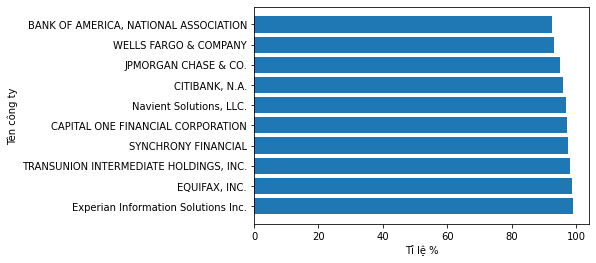

In [35]:
plt.barh(Final_optimis_10.index, Final_optimis_10.values)
plt.xlabel('Tỉ lệ %')
plt.ylabel('Tên công ty')
plt.show()

---

## Đôi lời cuối cùng - Nhìn lại quá trình thực hiện đồ án

### Đối với Long:
- Nhận ra được tầm quan trọng của khâu chuẩn bị, tìm kiếm dữ liệu phân tích. Em cảm thấy đây là phần khó khăn nhất khi phải tìm kiếm dữ liệu sao cho đủ chiều sâu và chiều rộng để có thểm đảm bảo kết quả phân tích dữ liệu sẽ nói lên một điều hữu ích.
    
- Vì dữ liệu lấy trên kaggle nhưng dữ liệu gốc ở 1 trang khác, nên phải sang trang gốc đó để tìm hiểu lại ý nghĩa kỹ càng hơn của dữ liệu, chứ người upload trên kaggle không đưa ra file ghi rõ ý nghĩa. Quá trình này gây khó khăn bởi vì các ý nghĩa của cột cũng như của các giá trị có liên quan đến tài chính, em phải lên mạng tìm hiểu thêm, rồi hỏi bạn bè đang học về lĩnh vực này để đảm bảo hiểu đúng các thông tin trong dữ liệu.

### Đối với Khuê:
- Học thêm được về kỹ năng tìm hiểu dữ liệu, khám phá dữ liệu hơn. Trước giờ trong các bài lab thì phần tìm kiếm dữ liệu, cũng như các insight về dữ liệu được thầy cung cấp sẵn, chủ yếu em chỉ phải thực hiện thao tác luyện tập với các thư viện, câu lệnh để xử lý theo yêu cầu thầy nêu ra. Còn giờ em phải tự xử lý mọi thứ, từ tìm dữ liệu, hiểu về dữ liệu, phân tích dữ liệu thế nào để cho ra kết quả hợp lý,. Và phần tìm kiếm, hiểu về dữ liệu là một vấn đề thực sự khó khăn, trước giờ em cứ nghĩ là dữ liệu thì đầy rẫy ra, mình lấy về rồi đọc một chút là được, chủ yếu khó ở phần phải nhớ là dùng các hàm, thư viện nào để xử lý được nhanh nhất; nhưng xong đồ án thì em mới cảm nhận rõ ràng hơn về độ khó khăn của những bước đầu tiên là thế nào.

- Cũng gặp khó khăn trong việc hiểu về dữ liệu và có những thuật ngữ,ý nghĩa liên quan mật thiết đến kinh tế, một lĩnh vực em chưa hiểu nhiều, dẫn đến khó khăn khi phân tích dữ liệu.

### Đối với cả nhóm (nhìn lại toàn bộ quá trình thực hiện của nhóm):
- Khó khăn chung đầu tiên của cả nhóm gặp phải là tìm dữ liệu. Cả hai chúng em ban đầu cứ nghĩ tìm dữ liệu trên kaggle 1 buổi là xong, do thấy có rất nhiều dữ liệu, kiểu tha hồ mà chọn. Tuy nhiên khi bắt tay vào làm mới thấy sự khó khăn này khi mà có dữ liệu này chủ đề khá hay nhưng khi xem kỹ thì thấy thiếu chiều sâu ( ít cột quá, không nói lên gì nhiều); có dữ liệu khác thì lại không đủ độ lớn( số dòng) để giúp tăng độ tin cậy hơn,...Những buổi họp nhóm tìm dữ liệu đâu tiên là tụi em cứ loay hoay, lẩn quẩn trong việc tìm dữ liệu. Tới lúc mà tìm được dữ liệu rồi, nghĩ là ổn rồi và định là từ bữa sau sẽ bắt đầu đi vào phân tích, thì lúc off 2 đứa tự xem lại dữ liệu thì lại thay phiên nhau phát hiện ra những điều chưa ổn của dữ liệu đó, thế là bữa sau lại lên tìm kiếm dữ liệu tiếp. Phải mất hơn 1 tuần đầu tiên thì bọn em mới chốt được dữ liệu mình sẽ sử dụng cho bài.

- Một khó khăn nữa là thời gian làm đồ án trùng với khá nhiều các mốc thời gian đồ án của các môn khác cũng như của HW3. Bọn em phải làm kiểu khá nhiều thứ trong 1 khoảng thời gian, các môn khác đến cuối kỳ cũng có nhiều đồ án cần giải quyết, và còn có kỳ thi cuối kỳ nữa thành ra thú thật thì bọn em cũng không thể dành được quá nhiều thời gian cho đồ án lần này. Bọn em đã cố gắng hoàn thành tốt nhất có thể theo ý của mình, tuy nhiên chắc chắn còn nhiều thiếu sót. Tiêu biểu là bọn em chưa đào được quá sâu dữ liệu, chưa thực sự khai thác hết tiềm năng dữ liệu và kết hợp nó với kiến thức thực tiễn và cả kiến thức về kinh tế - tài chính nữa, nếu cải thiện được mặt này thì việc phân tích dữ liệu sẽ còn tốt hơn.






## Tham khảo
[Link của dữ liệu gốc trên trang CFBP](https://www.consumerfinance.gov/data-research/consumer-complaints/search/?dataNormalization=None&dateRange=3y&date_received_max=2022-01-20&date_received_min=2019-01-20&searchField=all&tab=Map)

[Thư viện pandas](https://pandas.pydata.org/docs/reference/)

Và các bải giảng, các HW cũ và các file Demo của thầy Kiên trong quá trình giảng dạy.